In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("emissions_high_granularity.csv")

In [3]:
df.head()

,year,parent_entity,parent_type,reporting_entity,commodity,production_value,production_unit,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e,source
0,1962,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,0.9125,Million bbl/yr,0.338928,0.005404,0.001299,0.0,0.018254,0.000652,0.024957,0.363885,Abu Dhabi National Oil Company Annual Report 1...
1,1963,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,1.8250,Million bbl/yr,0.677855,0.010808,0.002598,0.0,0.036508,0.001304,0.049914,0.727770,Abu Dhabi National Oil Company Annual Report 1...
2,1964,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,7.3000,Million bbl/yr,2.711422,0.043233,0.010392,0.0,0.146033,0.005215,0.199657,2.911079,Abu Dhabi National Oil Company Annual Report 1...
3,1965,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,10.9500,Million bbl/yr,4.067132,0.064849,0.015588,0.0,0.219049,0.007823,0.299486,4.366618,Abu Dhabi National Oil Company Annual Report 1...
4,1966,Abu Dhabi National Oil Company,State-owned Entity,Abu Dhabi,Oil & NGL,13.5050,Million bbl/yr,5.016130,0.079980,0.019225,0.0,0.270160,0.009649,0.369366,5.385495,Abu Dhabi National Oil Company Annual Report 1...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15797 entries, 0 to 15796
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   year                                15797 non-null  int64  
 1   parent_entity                       15797 non-null  object 
 2   parent_type                         15797 non-null  object 
 3   reporting_entity                    15797 non-null  object 
 4   commodity                           15797 non-null  object 
 5   production_value                    15797 non-null  float64
 6   production_unit                     15797 non-null  object 
 7   product_emissions_MtCO2             15797 non-null  float64
 8   flaring_emissions_MtCO2             15797 non-null  float64
 9   venting_emissions_MtCO2             15797 non-null  float64
 10  own_fuel_use_emissions_MtCO2        15797 non-null  float64
 11  fugitive_methane_emissions_MtCO2e   15797

In [5]:
df.describe()

,year,production_value,product_emissions_MtCO2,flaring_emissions_MtCO2,venting_emissions_MtCO2,own_fuel_use_emissions_MtCO2,fugitive_methane_emissions_MtCO2e,fugitive_methane_emissions_MtCH4,total_operational_emissions_MtCO2e,total_emissions_MtCO2e
count,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000,15797.000000
mean,1985.827942,327.879634,79.391514,0.517226,0.462462,0.688676,8.884203,0.317293,10.552566,89.944080
std,28.664256,1188.625001,261.984080,1.783744,1.804575,3.564171,31.358244,1.119937,34.790479,292.843491
min,1854.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1970.000000,11.800000,5.996490,0.000000,0.000000,0.000000,0.607068,0.021681,0.751999,7.208860
50%,1993.000000,59.970871,21.502409,0.015913,0.045247,0.000000,2.351126,0.083969,2.869611,25.116721
75%,2007.000000,246.375000,62.191954,0.197253,0.329719,0.162415,7.401655,0.264345,8.965620,72.255340
max,2022.000000,27192.000000,7769.222235,27.026872,41.458662,83.203465,877.683714,31.345847,877.683714,8646.905949


In [6]:
df.isnull().sum()

year                                  0
parent_entity                         0
parent_type                           0
reporting_entity                      0
commodity                             0
production_value                      0
production_unit                       0
product_emissions_MtCO2               0
flaring_emissions_MtCO2               0
venting_emissions_MtCO2               0
own_fuel_use_emissions_MtCO2          0
fugitive_methane_emissions_MtCO2e     0
fugitive_methane_emissions_MtCH4      0
total_operational_emissions_MtCO2e    0
total_emissions_MtCO2e                0
source                                0
dtype: int64

In [7]:
# Handle Duplicates
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


C:\Users\Pavan\AppData\Local\Temp\ipykernel_61532\3005447131.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


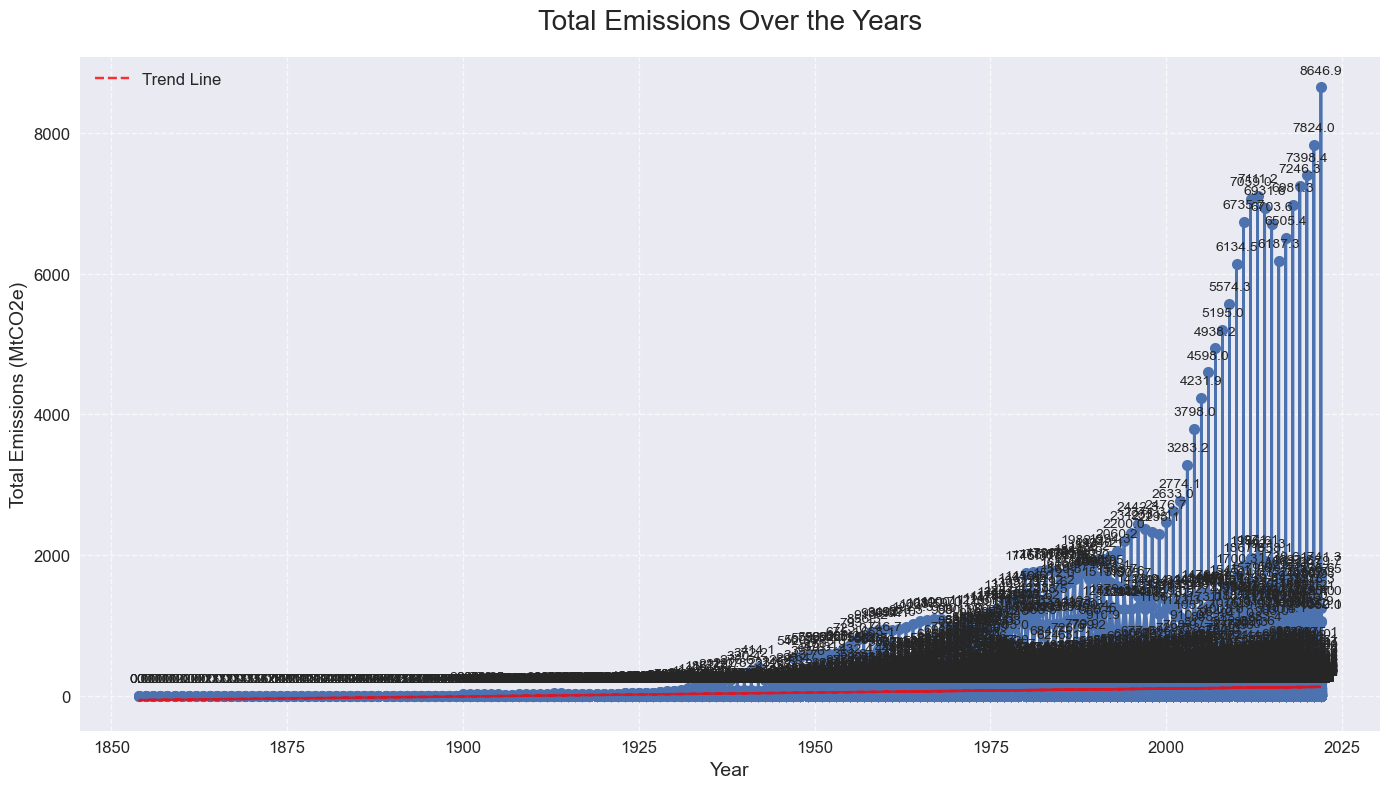

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a more modern look
plt.style.use('seaborn')

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the data with a thicker line and larger markers
ax.plot(df['year'], df['total_emissions_MtCO2e'], marker='o', linestyle='-', linewidth=2, markersize=8)

# Customize the plot
ax.set_title('Total Emissions Over the Years', fontsize=20, pad=20)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Total Emissions (MtCO2e)', fontsize=14)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Customize tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Add data labels
for x, y in zip(df['year'], df['total_emissions_MtCO2e']):
    ax.annotate(f'{y:.1f}', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

# Add a trend line
z = np.polyfit(df['year'], df['total_emissions_MtCO2e'], 1)
p = np.poly1d(z)
ax.plot(df['year'], p(df['year']), "r--", alpha=0.8, label="Trend Line")

# Add legend
ax.legend(fontsize=12)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

C:\Users\Pavan\AppData\Local\Temp\ipykernel_61532\1933959466.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


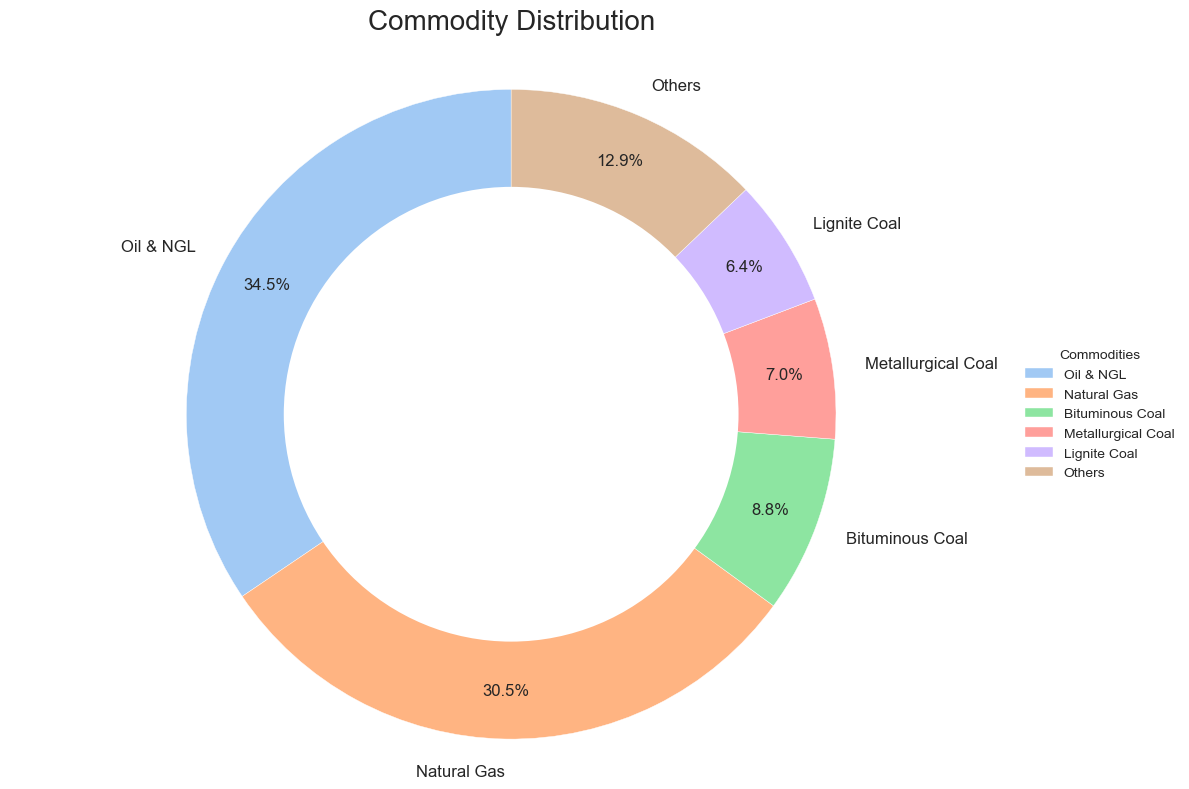

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a more modern look
plt.style.use('seaborn')

# Get the commodity counts and sort them
commodity_counts = df['commodity'].value_counts()
commodity_counts_sorted = commodity_counts.sort_values(ascending=False)

# Select top 5 commodities and group others
top_5 = commodity_counts_sorted.head(5)
others = pd.Series({'Others': commodity_counts_sorted.iloc[5:].sum()})
data = pd.concat([top_5, others])

# Create a color palette
colors = sns.color_palette('pastel')[0:6]

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Create the pie chart
wedges, texts, autotexts = ax.pie(data, 
                                  labels=data.index, 
                                  autopct='%1.1f%%',
                                  pctdistance=0.85,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=dict(width=0.5, edgecolor='white'))

# Add a circle at the center to create a donut chart effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Customize the chart
plt.title('Commodity Distribution', fontsize=20, pad=20)
plt.axis('equal')

# Enhance the appearance of labels and percentages
for text in texts + autotexts:
    text.set_fontsize(12)

# Add a legend
ax.legend(wedges, data.index,
          title="Commodities",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

C:\Users\Pavan\AppData\Local\Temp\ipykernel_61532\1533719961.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


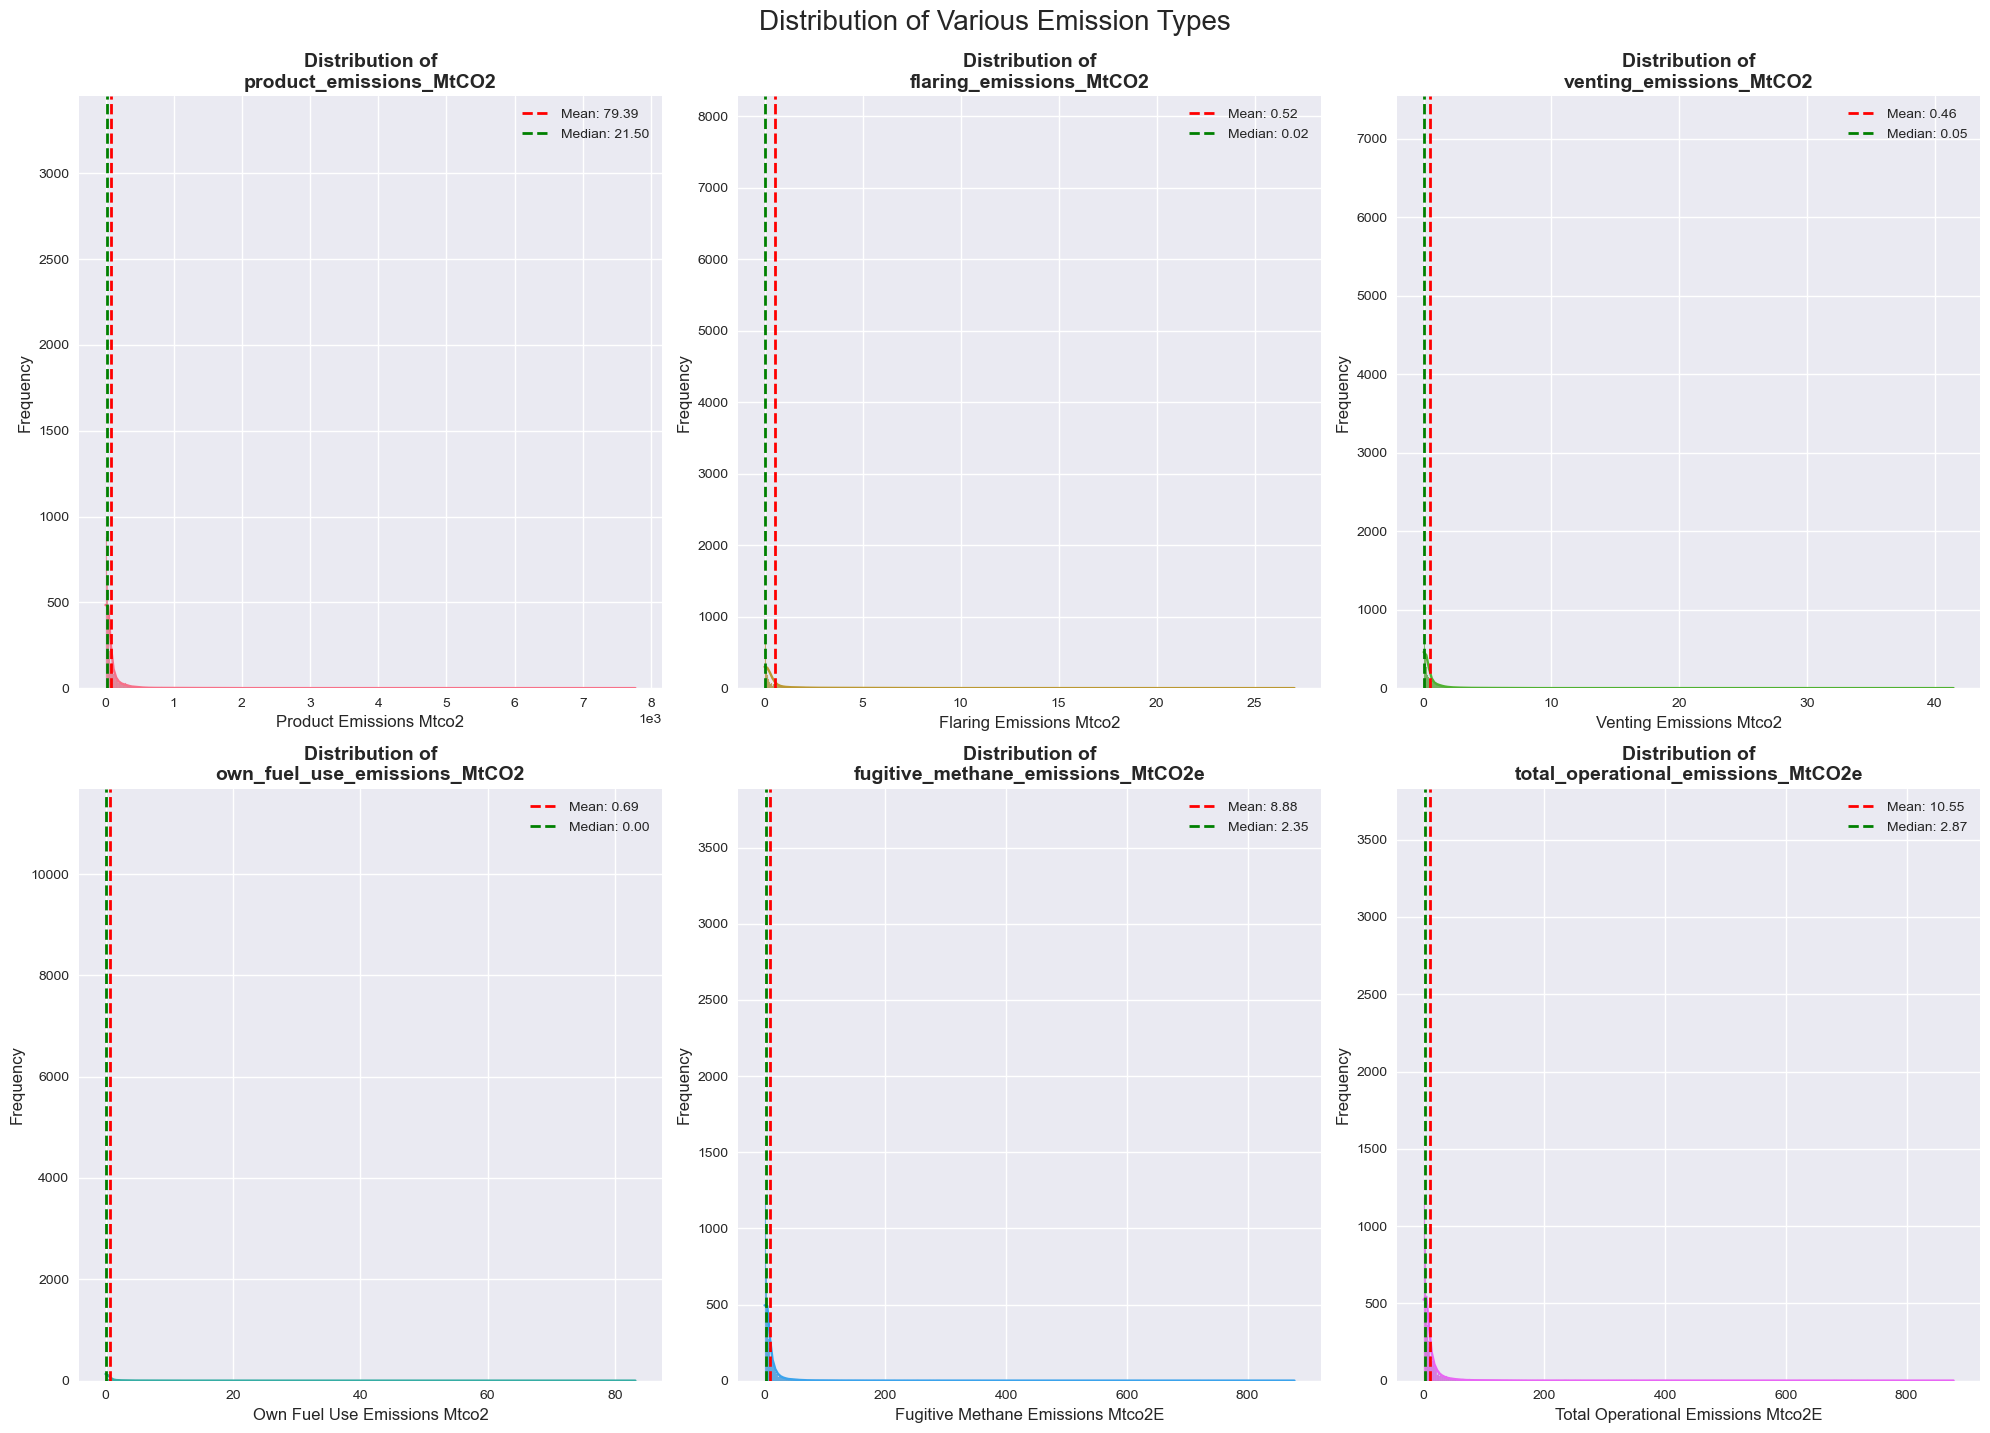

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for a more modern look
plt.style.use('seaborn')

# Define emission columns
emissions_columns = ['product_emissions_MtCO2', 'flaring_emissions_MtCO2', 'venting_emissions_MtCO2', 
                     'own_fuel_use_emissions_MtCO2', 'fugitive_methane_emissions_MtCO2e', 'total_operational_emissions_MtCO2e']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 14))
axes = axes.flatten()

# Custom color palette
colors = sns.color_palette("husl", 6)

for i, col in enumerate(emissions_columns):
    # Create histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[i], color=colors[i], edgecolor='black', alpha=0.7)
    
    # Customize each subplot
    axes[i].set_title(f'Distribution of\n{col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col.replace('_', ' ').title(), fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)
    
    # Add mean and median lines
    mean = df[col].mean()
    median = df[col].median()
    axes[i].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    axes[i].axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    
    # Add legend
    axes[i].legend(fontsize=10)
    
    # Use scientific notation for x-axis if values are very large
    if df[col].max() > 1000:
        axes[i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Adjust layout
plt.tight_layout()

# Add a main title
fig.suptitle('Distribution of Various Emission Types', fontsize=20, y=1.02)

plt.show()

C:\Users\Pavan\AppData\Local\Temp\ipykernel_61532\3389521342.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


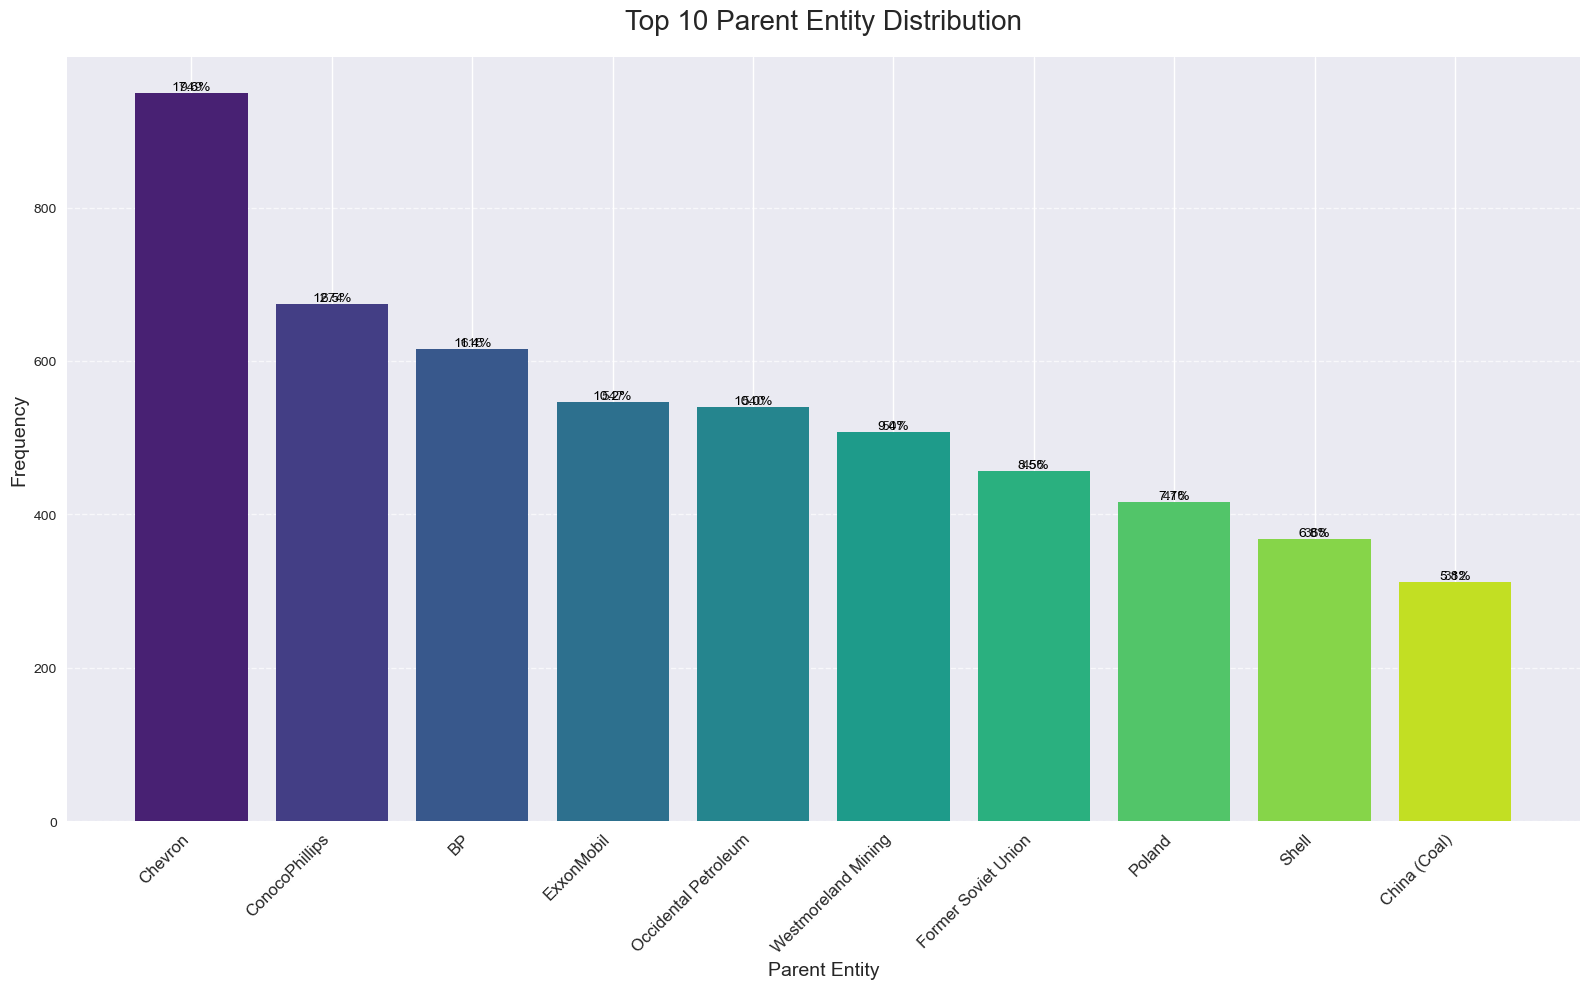

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the style for a more modern look
plt.style.use('seaborn')

# Get the top 10 parent entities
parent_entity_counts = df['parent_entity'].value_counts().head(10)

# Create a color palette
colors = sns.color_palette("viridis", n_colors=10)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(16, 10))

# Create the bar plot
bars = ax.bar(parent_entity_counts.index, parent_entity_counts.values, color=colors)

# Customize the plot
ax.set_title('Top 10 Parent Entity Distribution', fontsize=20, pad=20)
ax.set_xlabel('Parent Entity', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

# Rotate x-axis labels and adjust their alignment
plt.xticks(rotation=45, ha='right', fontsize=12)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:,}',
            ha='center', va='bottom', fontsize=10)

# Add a grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Calculate and display the percentage each entity represents
total = parent_entity_counts.sum()
for i, v in enumerate(parent_entity_counts.values):
    percentage = v / total * 100
    ax.text(i, v, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [13]:
# Data Preprocessing
df = pd.get_dummies(df, columns=['parent_entity', 'parent_type', 'reporting_entity', 'commodity', 'production_unit', 'source'], drop_first=True)

Mean Squared Error: 92.60
R-squared Score: 1.00
Cross-validation scores: [0.99999004 0.48407995 0.9057664  0.9999953  0.99976818]
Mean CV score: 0.88

Feature ranking:
1. x1 (0.870659)
2. x6 (0.061968)
3. x5 (0.052417)
4. x7 (0.008141)
5. x0 (0.006232)
6. x3 (0.000361)
7. x4 (0.000120)
8. x2 (0.000099)
9. x35 (0.000002)
10. x195 (0.000001)


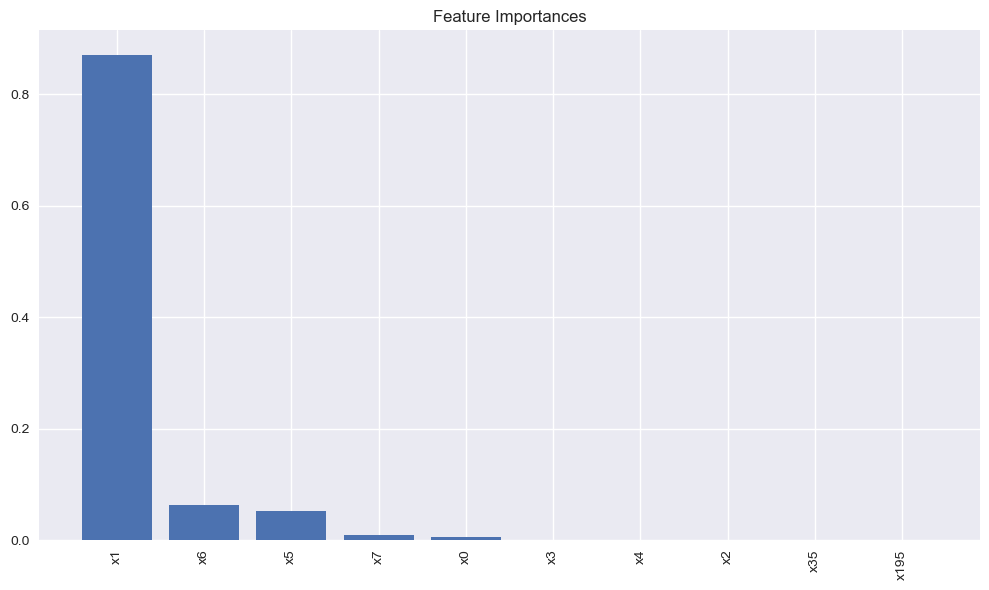

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming df is your DataFrame

# Separate features and target
X = df.drop(columns=['year', 'total_emissions_MtCO2e'])
y = df['total_emissions_MtCO2e']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for preprocessing and model training
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler()),  # Scale features
    ('feature_selection', SelectKBest(f_regression, k=10)),  # Select top 10 features
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

# Feature importance
feature_importance = pipeline.named_steps['model'].feature_importances_
feature_names = pipeline.named_steps['feature_selection'].get_feature_names_out()

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("\nFeature ranking:")
for f in range(len(feature_names)):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Pavan\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

               Model           MSE           MAE        R2  CV Score
0  Linear Regression  4.245372e-26  7.366227e-14  1.000000  1.000000
1   Ridge Regression  1.093789e-01  1.054322e-01  0.999998  0.999983
2   Lasso Regression  7.923778e-01  4.322909e-01  0.999985  0.999969
3      Random Forest  9.260006e+01  5.207538e-01  0.998263  0.877920
4  Gradient Boosting  8.291818e+01  1.916141e+00  0.998444  0.886728
5                SVR  3.544674e+04  2.253936e+01  0.334996  0.565866
6     Neural Network  1.386346e+00  3.822937e-01  0.999974  0.987417


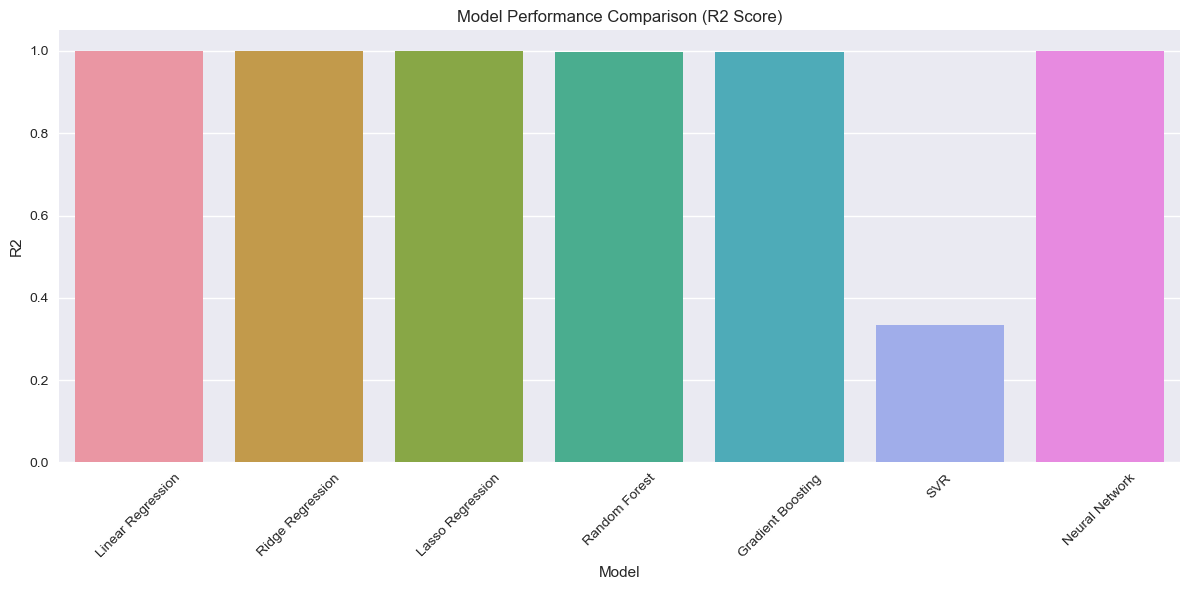


Feature ranking:
1. x1 (0.896173)
2. x6 (0.050960)
3. x5 (0.040221)
4. x7 (0.008314)
5. x0 (0.003684)
6. x3 (0.000404)
7. x4 (0.000140)
8. x2 (0.000099)
9. x35 (0.000002)
10. x195 (0.000001)


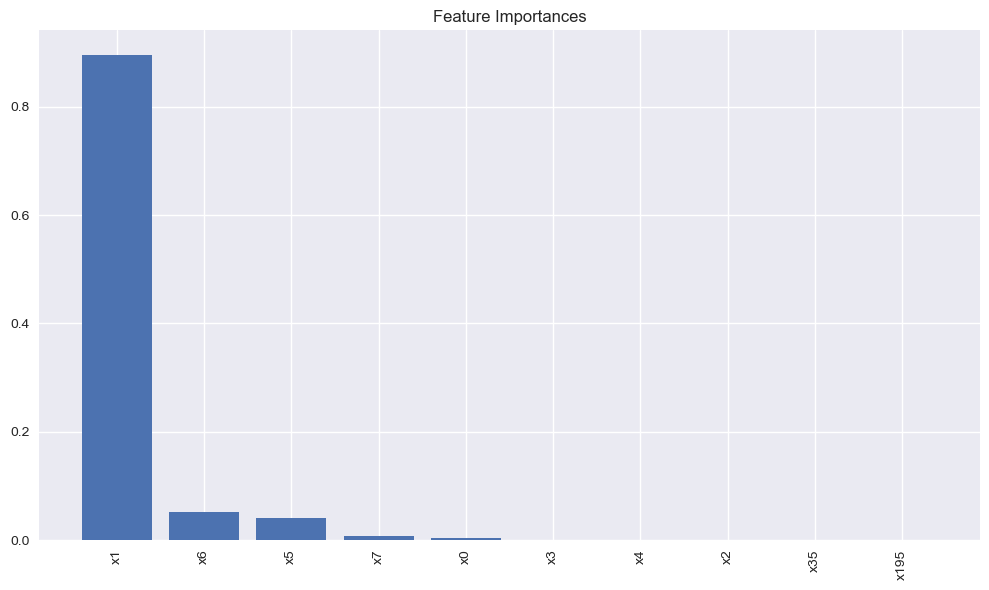

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Separate features and target
X = df.drop(columns=['year', 'total_emissions_MtCO2e'])
y = df['total_emissions_MtCO2e']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'Neural Network': MLPRegressor(random_state=42)
}

# Create a pipeline
def create_pipeline(model):
    return Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('feature_selection', SelectKBest(f_regression, k=10)),
        ('model', model)
    ])

# Train and evaluate models
results = []
for name, model in models.items():
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    
    results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2': r2,
        'CV Score': cv_scores.mean()
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Visualize model performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('Model Performance Comparison (R2 Score)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature importance for the best model (assuming Random Forest performs best)
best_model = create_pipeline(RandomForestRegressor(n_estimators=100, random_state=42))
best_model.fit(X, y)

feature_importance = best_model.named_steps['model'].feature_importances_
feature_names = best_model.named_steps['feature_selection'].get_feature_names_out()

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("\nFeature ranking:")
for f in range(len(feature_names)):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importance)), feature_importance[indices])
plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

                                0
Model               Random Forest
MSE                      1.386346
MAE                      0.382294
R-squared                0.999974
RMSE                     1.177432
Explained Variance       0.999974

Cross-validation R2 scores: [0.99999495 0.99991979 0.99975729 0.99972232 0.99998984]
Mean CV R2 score: 0.9999 (+/- 0.0002)


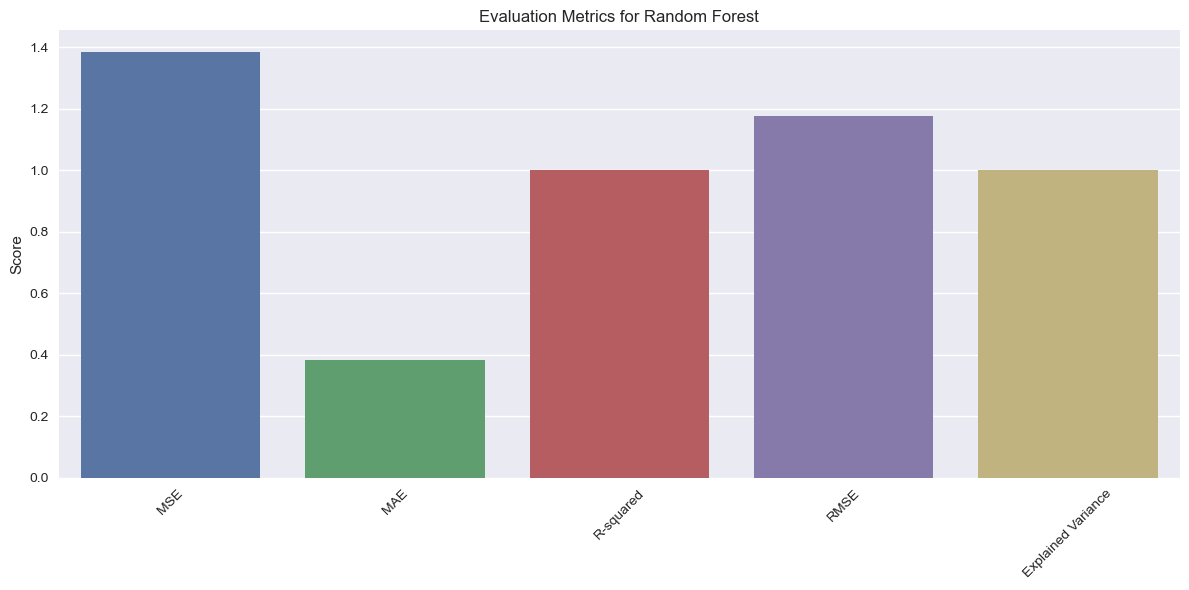

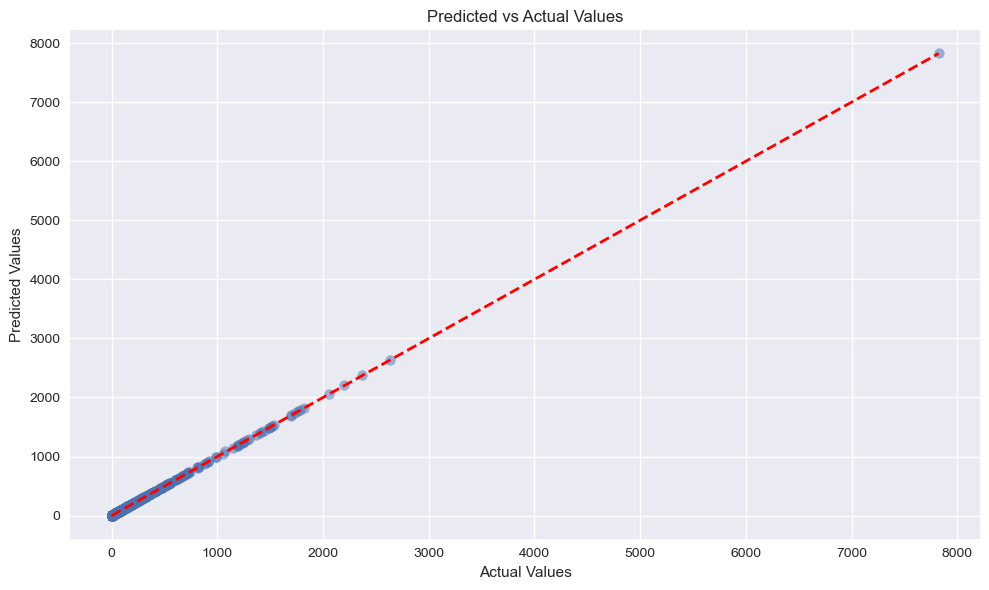

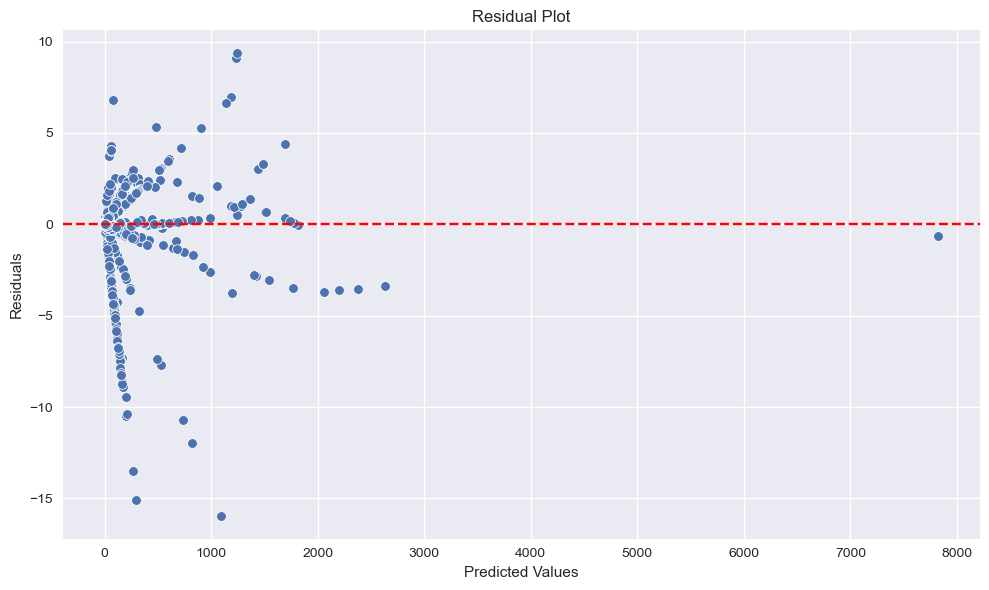

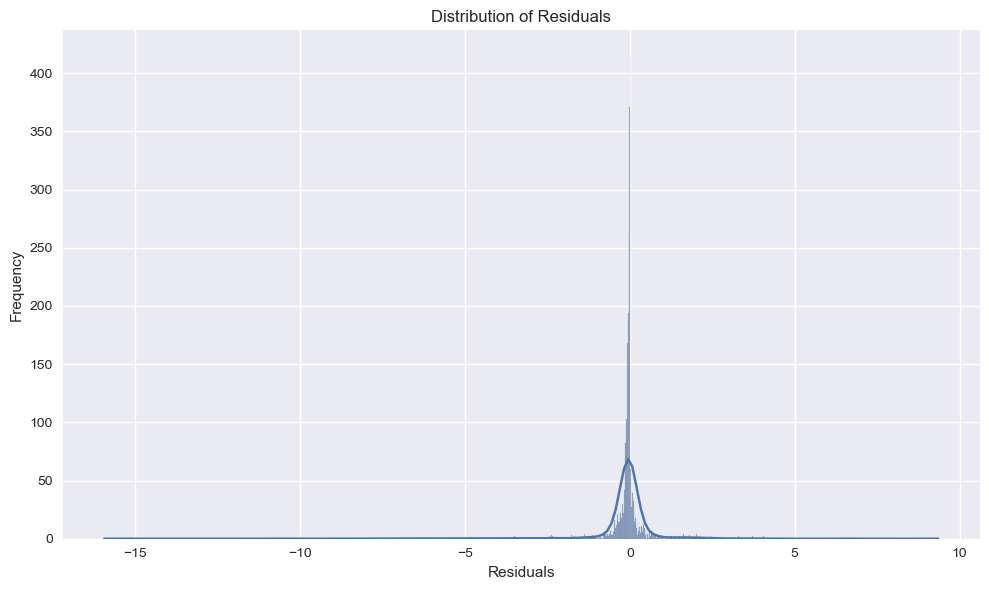

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score

def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(y_true, y_pred)
    
    metrics = {
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'R-squared': r2,
        'RMSE': rmse,
        'Explained Variance': evs
    }
    
    return metrics

# Assuming you have y_test and y_pred from your model predictions
metrics = evaluate_model(y_test, y_pred, 'Random Forest')

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame([metrics])

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print the metrics
print(metrics_df.T)
print(f"\nCross-validation R2 scores: {cv_scores}")
print(f"Mean CV R2 score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Visualize the metrics
plt.figure(figsize=(12, 6))
sns.barplot(x=metrics_df.columns[1:], y=metrics_df.iloc[0, 1:])
plt.title(f'Evaluation Metrics for {metrics["Model"]}')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()